In [48]:
import pandas as pd    ## pandas是python数据分析库，提供高效数据结构和工具，用于数据清洗、分析与可视化
import numpy as np     ## numpy是python中用于科学计算的核心库，支持高效的数值运算和数据处理

data = [107, 73, 68, 97, 76, 79, 94, 59, 98, 57, 73, 81, 54, 65, 71, 80, 84, 88, 62, 61,
        79, 98, 63, 65, 66, 62, 79, 86, 68, 74, 61, 82, 65, 98, 63, 71, 62, 116, 65, 88,
        64, 79, 78, 79, 77, 86, 89, 76, 74, 85, 73, 80, 68, 78, 89, 72, 58, 69, 82, 72,
        92, 78, 88, 77, 103, 88, 63, 68, 88, 81, 64, 73, 75, 90, 62, 89, 71, 71, 74, 70,
        74, 70, 85, 61, 65, 81, 75, 62, 94, 71, 85, 84, 83, 63, 92, 68, 81, 62, 79, 83,
        93, 61, 65, 62, 92, 65, 64, 66, 83, 70, 70, 81, 77, 72, 84, 67, 59, 58, 73, 83,
        78, 66, 66, 94, 77, 63, 66, 75, 68, 76, 73, 76, 90, 78, 71, 101, 78, 43, 59, 67,
        61, 71, 77, 91, 96, 75, 64, 76, 72, 77, 74, 65, 82, 86, 79, 74, 66, 86, 96, 89,
        81, 71, 85, 99, 59, 92, 94, 62, 68, 72, 77, 60, 87, 84, 75, 77, 51, 45, 63, 102,
        85, 67, 87, 80, 84, 93, 69, 76, 89, 75, 59, 77, 83, 68, 72, 67, 92, 89, 82, 96]

bin = [i for i in range(40,120,4)]     ## 选择端点：生成从40到120(不包含120)、步长为4的整数序列，并组成新的列表bin，作为数据分箱的区间端点

qujian = ['('+str(bin[i])+','+str(bin[i+1])+']' for i in range(len(bin)-1)]   ## 标记区间：将bin列表中的第i个元素和第i+1个元素转换为字符串，并拼接成区间字符串

huafen = pd.cut(data,bins=bin)    ## 分割数据：pd.cut是pandas的分箱函数，bins=bin指定分箱的区间端点为之前定义的bin列表，结果存储在huafen中

pinshu = list(huafen.value_counts())      ## 统计频数：对huafen中出现的频数进行统计，转换成list列表，存储在pinshu中

df = pd.DataFrame({"寿命区间":qujian, "落入频数":pinshu})     ## 创建一个pandas的DataFrame对象，用字典的形式指定DataFrame的列

df["频率"] = np.round(df["落入频数"]/len(data),4)    ## 使用numpy的round函数将计算的频率保留4位小数点

df   ## 输出DataFrame对象df，展示


,寿命区间,落入频数,频率
0,"(40,44]",1,0.005
1,"(44,48]",1,0.005
2,"(48,52]",1,0.005
3,"(52,56]",1,0.005
4,"(56,60]",9,0.045
5,"(60,64]",23,0.115
6,"(64,68]",26,0.130
7,"(68,72]",20,0.100
8,"(72,76]",24,0.120
9,"(76,80]",25,0.125


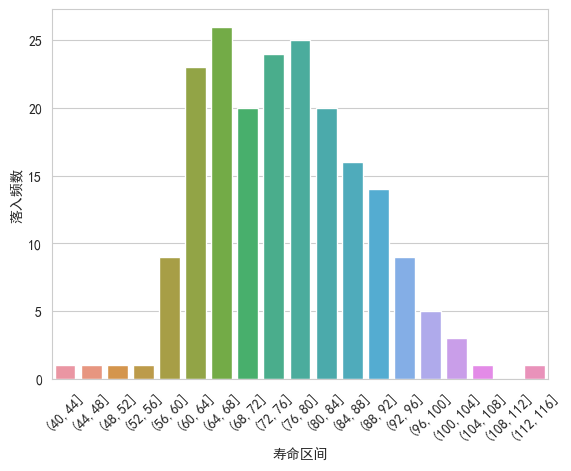

In [49]:
from matplotlib import pyplot as plt
# matplotlib 是 Python 中最常用的数据可视化库，核心作用是将数值数据转换为直观的图表（如折线图、柱状图、散点图等）
import seaborn as sns
# Seaborn 是基于 matplotlib 开发的 Python 数据可视化库，核心作用是简化高质量统计图表的绘制流程。seaborn可以快速美化图表。
import warnings
warnings.filterwarnings("ignore")     # 忽略所有警告

# 使用seaborn库绘图
# 设置绘图风格及字体
sns.set_style('whitegrid')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 设置横纵坐标
count = df["落入频数"]
index = df["寿命区间"]
sns.barplot(x=index,y=count)
plt.xticks(rotation=45)   # 设置倾斜角度
plt.show()

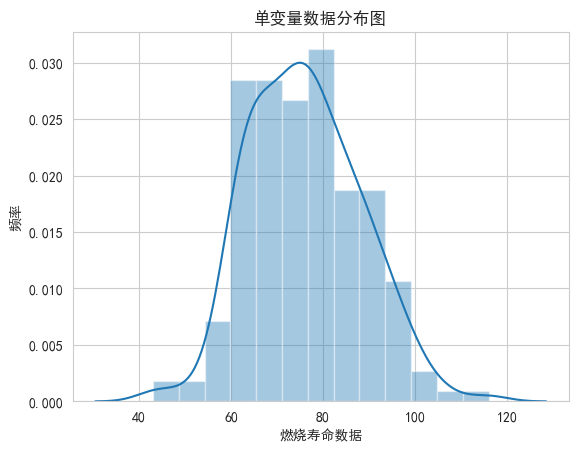

In [50]:
sns.distplot(data,kde = True)    # kde是核密度估计
plt.title('单变量数据分布图')
plt.xlabel('燃烧寿命数据')
plt.ylabel('频率')
plt.show()

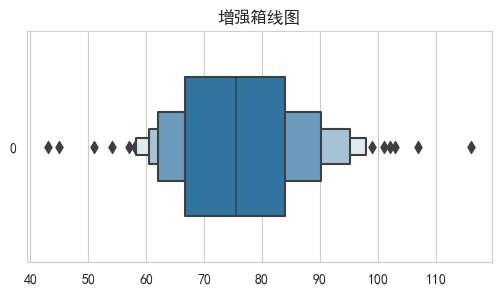

In [51]:
plt.figure(figsize = (6,3))
sns.boxenplot(data = data,orient='h',width = 0.6)
plt.title('增强箱线图')
plt.show()

In [52]:
Data = pd.Series(data)  # 列表转换为序列
Data.describe()     # 基本描述统计量，针对序列！

count    200.000000
mean      76.050000
std       12.060463
min       43.000000
25%       66.750000
50%       75.500000
75%       84.000000
max      116.000000
dtype: float64

In [53]:
Data.skew()   # 偏态系数

0.27702753367295824

In [54]:
Data.kurt()   # 峰态系数

0.035571456224932074

In [55]:
# 自编函数进行描述性分析
def Stats(x):
    stat = [x.count(), x.min(), x.quantile(.25), x.mean(), x.median(), x.quantile(.75), x.max(),
           x.max()-x.min(), x.var(), x.std(), x.skew(), x.kurt()]
    name = ['计数', '最小值', '下四分位数', '均值', '中位数', '上四分位数','最大值',
           '极差', '方差', '标准差', '偏度', '峰度']
    symbol = ['Count', 'Min', 'Q1(25%)', 'Mean', 'Median', 'Q3(75%)', 'Max',
             'Range', 'Var', 'Std', 'Skew', 'Kurt']
    stats = pd.DataFrame({'统计量':name, '符号':symbol, '数值':stat})
    return(stats)
Stats(Data)

,统计量,符号,数值
0,计数,Count,200.000000
1,最小值,Min,43.000000
2,下四分位数,Q1(25%),66.750000
3,均值,Mean,76.050000
4,中位数,Median,75.500000
5,上四分位数,Q3(75%),84.000000
6,最大值,Max,116.000000
7,极差,Range,73.000000
8,方差,Var,145.454774
9,标准差,Std,12.060463
